#### About

> RANSAC

RANSAC (RANdom SAmple Consensus) is an iterative algorithm used in supervised machine learning for robust model fitting to data with outliers. It is commonly used for regression or classification tasks where there may be noisy or incomplete data.

The basic idea of RANSAC is to randomly sample a subset of data points, fit a model to these sampled points, and then evaluate the model on the remaining data points. Points that are consistent with the model (i.e., lie close to the model's predictions) are considered inliers, while points that deviate significantly from the model are considered outliers. The algorithm iteratively refits the model using different random subsets of data and selects the model with the largest number of inliers as the final model.





In [1]:
import numpy as np
from sklearn.linear_model import RANSACRegressor
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt


In [2]:
# Generate synthetic data with outliers
X, y, true_coef = make_regression(n_samples=200, n_features=1, noise=10, coef=True, random_state=0)
np.random.seed(0)
n_outliers = 50
X[:n_outliers] = 3 + 0.5 * np.random.normal(size=(n_outliers, 1))
y[:n_outliers] = -3 + 10 * np.random.normal(size=n_outliers)


In [3]:
# Fit RANSAC model
ransac = RANSACRegressor()
ransac.fit(X, y)


RANSACRegressor()

In [4]:
# Extract inliers and outliers
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)


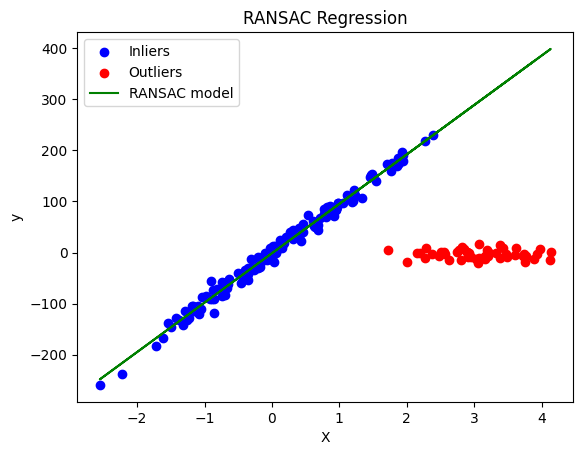

In [5]:
# Plot data points and RANSAC model
plt.scatter(X[inlier_mask], y[inlier_mask], color='blue', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask], color='red', label='Outliers')
plt.plot(X, ransac.predict(X), color='green', label='RANSAC model')
plt.legend(loc='best')
plt.xlabel('X')
plt.ylabel('y')
plt.title('RANSAC Regression')
plt.show()

> Use cases

1. Robust regression: RANSAC can be used to fit regression models to data with outliers, where traditional least squares regression may be sensitive to outliers.
2. Outlier detection: RANSAC can be used to identify outliers in a dataset by fitting a model to the data and identifying points that deviate significantly from the model's predictions.
3. Image stitching: RANSAC can be used to robustly estimate the transformation parameters for aligning and stitching together multiple images, where some images may have significant perspective distortion or other forms of geometric transformation.
